<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-and-visualing-the-dataset" data-toc-modified-id="Load-and-visualing-the-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load and visualing the dataset</a></span></li><li><span><a href="#Analyse-&amp;-Commentary-on-the-dataset" data-toc-modified-id="Analyse-&amp;-Commentary-on-the-dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Analyse &amp; Commentary on the dataset</a></span></li><li><span><a href="#Prediction-with-ARMA/ARIMA" data-toc-modified-id="Prediction-with-ARMA/ARIMA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Prediction with ARMA/ARIMA</a></span><ul class="toc-item"><li><span><a href="#Test-for-stationarity" data-toc-modified-id="Test-for-stationarity-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Test for stationarity</a></span><ul class="toc-item"><li><span><a href="#Gross-data-analysis" data-toc-modified-id="Gross-data-analysis-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Gross data analysis</a></span></li><li><span><a href="#Taking-the-monthy-difference" data-toc-modified-id="Taking-the-monthy-difference-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Taking the monthy difference</a></span></li></ul></li><li><span><a href="#Autocorrelation-(acf)-&amp;-Partial-autocorrelation-(pacf)" data-toc-modified-id="Autocorrelation-(acf)-&amp;-Partial-autocorrelation-(pacf)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Autocorrelation (acf) &amp; Partial autocorrelation (pacf)</a></span><ul class="toc-item"><li><span><a href="#Gross-data" data-toc-modified-id="Gross-data-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Gross data</a></span></li><li><span><a href="#Diff-data" data-toc-modified-id="Diff-data-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Diff data</a></span></li></ul></li><li><span><a href="#Build-ARIMA-Model" data-toc-modified-id="Build-ARIMA-Model-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Build ARIMA Model</a></span><ul class="toc-item"><li><span><a href="#Build-a-ARMA(4,2)" data-toc-modified-id="Build-a-ARMA(4,2)-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Build a ARMA(4,2)</a></span><ul class="toc-item"><li><span><a href="#Prediction-on-full-dataset" data-toc-modified-id="Prediction-on-full-dataset-3.3.1.1"><span class="toc-item-num">3.3.1.1&nbsp;&nbsp;</span>Prediction on full dataset</a></span></li><li><span><a href="#Back-to-level-data" data-toc-modified-id="Back-to-level-data-3.3.1.2"><span class="toc-item-num">3.3.1.2&nbsp;&nbsp;</span>Back to level data</a></span></li><li><span><a href="#Performance-of-the-prediction" data-toc-modified-id="Performance-of-the-prediction-3.3.1.3"><span class="toc-item-num">3.3.1.3&nbsp;&nbsp;</span>Performance of the prediction</a></span></li></ul></li></ul></li><li><span><a href="#Train-Test-Split-method-1" data-toc-modified-id="Train-Test-Split-method-1-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Train Test Split method 1</a></span></li><li><span><a href="#Re-Build-ARIMA-model" data-toc-modified-id="Re-Build-ARIMA-model-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Re-Build ARIMA model</a></span><ul class="toc-item"><li><span><a href="#ACF-&amp;-PACF" data-toc-modified-id="ACF-&amp;-PACF-3.5.1"><span class="toc-item-num">3.5.1&nbsp;&nbsp;</span>ACF &amp; PACF</a></span></li><li><span><a href="#Prediction" data-toc-modified-id="Prediction-3.5.2"><span class="toc-item-num">3.5.2&nbsp;&nbsp;</span>Prediction</a></span></li><li><span><a href="#Performance" data-toc-modified-id="Performance-3.5.3"><span class="toc-item-num">3.5.3&nbsp;&nbsp;</span>Performance</a></span></li></ul></li></ul></li><li><span><a href="#Train-Test-Split-method-2" data-toc-modified-id="Train-Test-Split-method-2-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Train Test Split method 2</a></span></li><li><span><a href="#Build-RNN-model" data-toc-modified-id="Build-RNN-model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Build RNN model</a></span><ul class="toc-item"><li><span><a href="#The-model" data-toc-modified-id="The-model-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>The model</a></span></li><li><span><a href="#Prediction" data-toc-modified-id="Prediction-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Prediction</a></span></li><li><span><a href="#Performance-of-the-model" data-toc-modified-id="Performance-of-the-model-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Performance of the model</a></span></li></ul></li><li><span><a href="#Build-LSTM-model" data-toc-modified-id="Build-LSTM-model-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Build LSTM model</a></span><ul class="toc-item"><li><span><a href="#The-model" data-toc-modified-id="The-model-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>The model</a></span></li><li><span><a href="#Prediction-on-y_Test" data-toc-modified-id="Prediction-on-y_Test-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Prediction on y_Test</a></span></li><li><span><a href="#Performance-of-the-model" data-toc-modified-id="Performance-of-the-model-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Performance of the model</a></span></li></ul></li><li><span><a href="#Build-XGBoost" data-toc-modified-id="Build-XGBoost-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Build XGBoost</a></span><ul class="toc-item"><li><span><a href="#Prediction" data-toc-modified-id="Prediction-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Prediction</a></span></li><li><span><a href="#Performance" data-toc-modified-id="Performance-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Performance</a></span></li></ul></li><li><span><a href="#Experimentation-by-Timeseriesgenerator" data-toc-modified-id="Experimentation-by-Timeseriesgenerator-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Experimentation by Timeseriesgenerator</a></span><ul class="toc-item"><li><span><a href="#Build-SimpleRNN-model" data-toc-modified-id="Build-SimpleRNN-model-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Build SimpleRNN model</a></span></li></ul></li><li><span><a href="#Global-Results-at-this-stage" data-toc-modified-id="Global-Results-at-this-stage-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Global Results at this stage</a></span></li></ul></div>

Brief : https://github.com/JTreguer/ia-bdx-ts-project2/blob/master/README.md  
Dataset on : https://data.world/environmentdata/climate-change-earth-surface  
more on : http://berkeleyearth.lbl.gov/regions/global-land

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
# initialize the seed
SEED = 42
import keras
keras.backend.clear_session()
from numpy import random as np_random
np_random.seed(SEED)
from tensorflow import random as tf_random
tf_random.set_seed(SEED)

Using TensorFlow backend.


In [3]:
nb_data = 3156 #lenght of data to analyse (3156 max len)
length_of_sequences = 10 #look back
test_size = 0.20 # size of dataset test (%)
gap = 0 #gap between train and test

# Load and visualing the dataset

In [4]:
df_init = pd.read_csv("GlobalLandTemperatures_GlobalTemperatures.csv")
df_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


In [5]:
df_init['dt'] = pd.to_datetime(df_init['dt'])
df_init.sort_values('dt', inplace=True)
df_init.set_index('dt', inplace=True)

print(df_init.shape)

df_init.head()

(3192, 8)


,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_init_v1= df_init["LandAverageTemperature"].copy()
df_init_v1 = pd.DataFrame(df_init_v1)
df_init_v1

,LandAverageTemperature
dt,
1750-01-01,3.034
1750-02-01,3.083
1750-03-01,5.626
1750-04-01,8.490
1750-05-01,11.573
...,...
2015-08-01,14.755
2015-09-01,12.999
2015-10-01,10.801


In [7]:
df_init_v1b = df_init_v1.loc["1753-01-01":"2015-12-01"].copy()
df_init_v1b 

,LandAverageTemperature
dt,
1753-01-01,2.039
1753-02-01,0.715
1753-03-01,5.424
1753-04-01,8.272
1753-05-01,12.186
...,...
2015-08-01,14.755
2015-09-01,12.999
2015-10-01,10.801


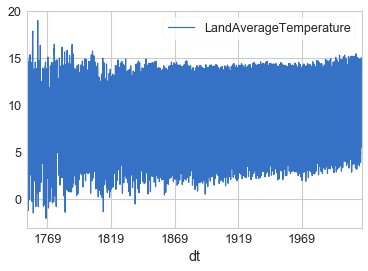

In [8]:
df_init_v1b.plot.line()

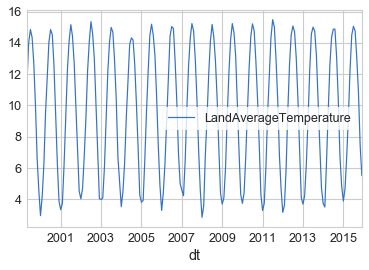

In [9]:
nb = 200
l = df_init_v1b.shape[0] 
df_init_v1b[l-nb:l].plot.line()

# Analyse & Commentary on the dataset

- Monthly time series
- 3192 data initially, but presented 12 NaN
- dropping NaN data, we have 3156 from January 1753 to December 2015 
- Time series are with no trend
- Time series seem presenting lots of seasonality

# Prediction with ARMA/ARIMA

In [10]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

## Test for stationarity

https://machinelearningmastery.com/time-series-data-stationary-python/

Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.  

Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

p-value

p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.


ADF Statistic

The more negative this statistic, the more likely we are to reject the null hypothesis (we have a stationary dataset).

As part of the output, we get a look-up table to help determine the ADF statistic. We can see that our statistic value of -4 is less than the value of -3.449 at 1%.

This suggests that we can reject the null hypothesis with a significance level of less than 1% (ADF is less than -3.449) (i.e. a low probability that the result is a statistical fluke).

Rejecting the null hypothesis means that the process has no unit root, and in turn that the time series is stationary or does not have time-dependent structure.

### Gross data analysis

In [11]:
temp=df_init_v1b.copy()
temp = temp[len(temp)-nb_data:len(temp)]
#temp = temp[:nb_data]
temp.shape

(3156, 1)

In [12]:
rolmean0 = temp.rolling(20).mean()
rolstd0 = temp.rolling(20).std()

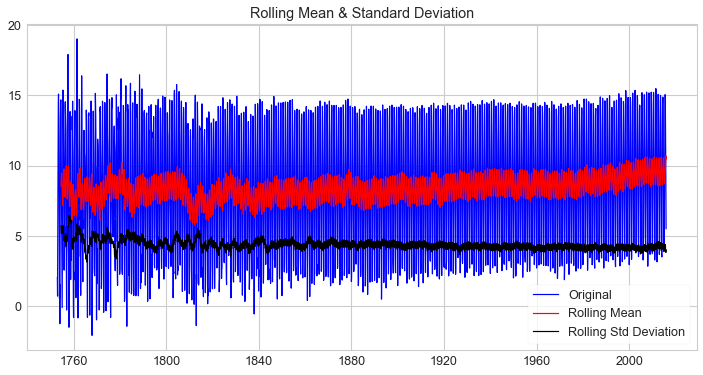

In [13]:
plt.figure(figsize=(12, 6))
orig0 = plt.plot(temp, color='blue', label='Original')
mean0 = plt.plot(rolmean0, color='red', label='Rolling Mean')
std0 = plt.plot(rolstd0, color='black', label = 'Rolling Std Deviation')
plt.title('Rolling Mean & Standard Deviation')
plt.legend(loc='best')
plt.show(block=False)

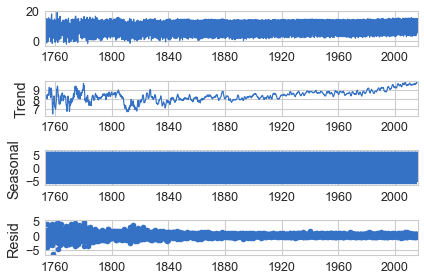

In [14]:
result0 = seasonal_decompose(temp, model='additive')
result0.plot()
plt.show()

In [15]:
# Perform Dickey-Fuller test
res_DF0 = adfuller(temp)
print('ADF Statistic: %f' % res_DF0[0])
print('p-value: %f' % res_DF0[1])
print('Critical Values:')
for key, value in res_DF0[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.675041
p-value: 0.004478
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


### Taking the monthy difference 

In [16]:
tempDiff = temp['LandAverageTemperature'].diff()
tempDiff = pd.DataFrame(tempDiff)
tempDiff.columns =['diff']
tempDiff.head(5)

,diff
dt,
1753-01-01,NaN
1753-02-01,-1.324
1753-03-01,4.709
1753-04-01,2.848
1753-05-01,3.914


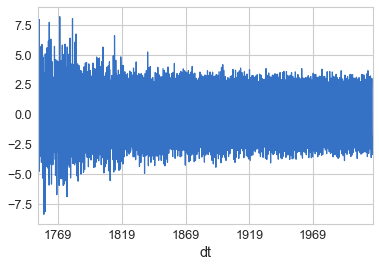

In [17]:
tempDiff['diff'].plot.line()

In [18]:
startValue = temp['LandAverageTemperature'][0]
tempDiff=tempDiff['diff'].iloc[1:]
print(tempDiff.shape)
print(startValue)

(3155,)
2.8360000000000003


In [19]:
rolmean = tempDiff.rolling(20).mean()
rolstd = tempDiff.rolling(20).std()

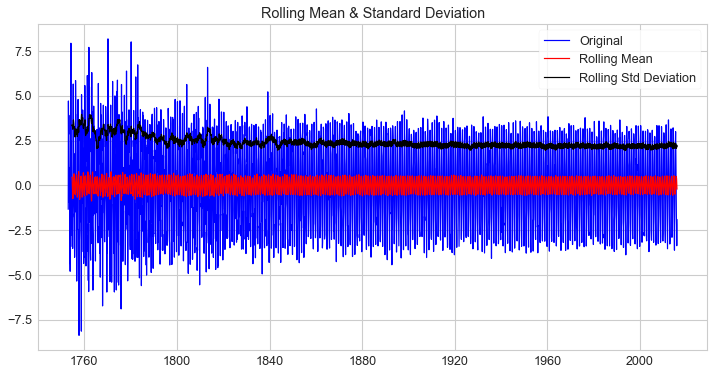

In [20]:
plt.figure(figsize=(12, 6))
orig = plt.plot(tempDiff, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std Deviation')
plt.title('Rolling Mean & Standard Deviation')
plt.legend(loc='best')
plt.show(block=False)

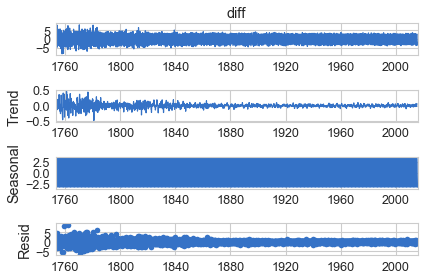

In [21]:
result = seasonal_decompose(tempDiff, model='additive')
result.plot()
plt.show()

In [22]:
# Perform Dickey-Fuller test
res_DF = adfuller(tempDiff)
print('ADF Statistic: %f' % res_DF[0])
print('p-value: %f' % res_DF[1])
print('Critical Values:')
for key, value in res_DF[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -16.010767
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


## Autocorrelation (acf) & Partial autocorrelation (pacf)

### Gross data

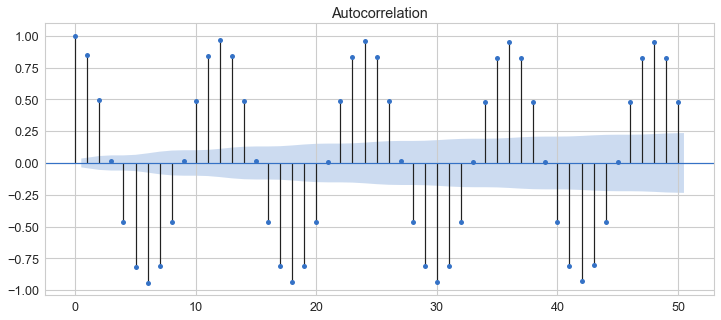

In [23]:
from statsmodels.graphics.tsaplots import plot_acf
# the autocorrelation chart provides just the correlation at increasing lags
fig, ax = plt.subplots(figsize=(12,5))
plot_acf(temp.values, lags=50, ax=ax)
plt.show()

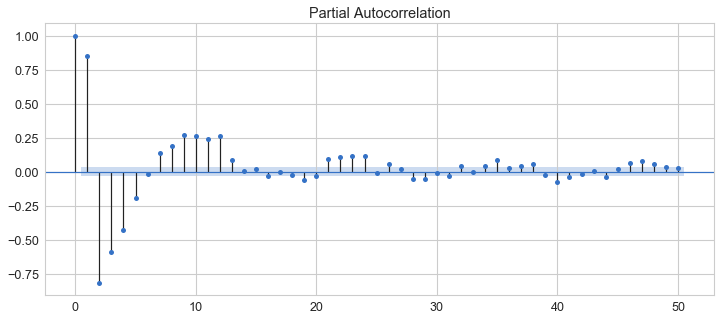

In [24]:
from statsmodels.graphics.tsaplots import plot_pacf
fig, ax = plt.subplots(figsize=(12,5)) 
plot_pacf(temp.values, lags=50, ax=ax)
plt.show()

### Diff data

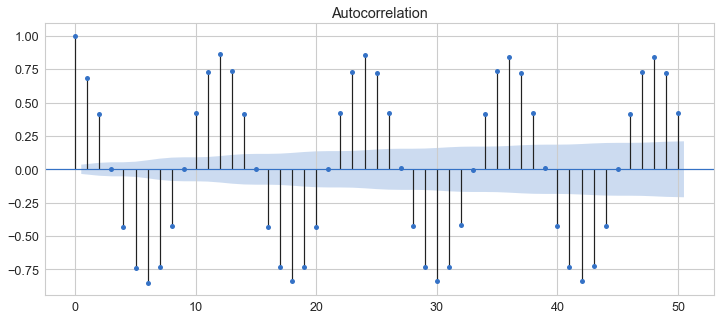

In [25]:
fig, ax = plt.subplots(figsize=(12,5))
plot_acf(tempDiff.values, lags=50, ax=ax)
plt.show()

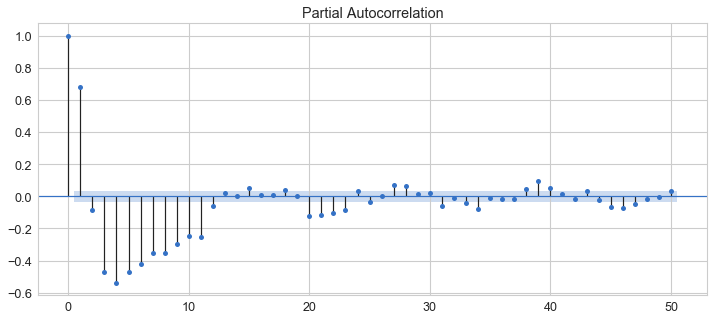

In [26]:
fig, ax = plt.subplots(figsize=(12,5))
plot_pacf(tempDiff.values, lags=50, ax=ax)
plt.show()

## Build ARIMA Model

### Build a ARMA(4,2)

In [27]:
from statsmodels.tsa.arima_model import ARMA

arma = ARMA(tuple(tempDiff.values), (4,2)).fit()
arma.summary()



C:\Users\Utilisateur\Anaconda3\envs\TimeSeries\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 3155
Model:                     ARMA(4, 2)   Log Likelihood               -3895.649
Method:                       css-mle   S.D. of innovations              0.831
Date:                Thu, 02 Apr 2020   AIC                           7807.298
Time:                        13:44:18   BIC                           7855.752
Sample:                             0   HQIC                          7824.682
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.003      0.137      0.891      -0.006       0.007
ar.L1.y        1.1545      0.022     53.520      0.000       1.112       1.197
ar.L2.y       -0.2827      0.031     -9.215      0.000      -0.343      -0.223
ar.L3.y       -0.0884      0.027     -3.237      0.001      -0.142      -0.035
ar.L4.y       -0.2797      0.019    -14.748      0.000      -0.317      -0.243
ma.L1.y       -1.6477      0.013   -123.270      0.000      -1.674      -1.622
ma.L2.y        0.7541      0.026     28.818      0.000       0.703       0.805
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.8673           -0.5006j            1.0014           -0.0833
AR.2            0.8673           +0.5006j            1.0014            0.0833
AR.3           -1.0253           -1.5854j            1.8880           -0.3414
AR.4           -1.0253           +1.5854j            1.8880            0.3414
MA.1            1.0926           -0.3640j            1.1516           -0.0512
MA.2            1.0926           +0.3640j            1.1516            0.0512
-----------------------------------------------------------------------------
"""

#### Prediction on full dataset

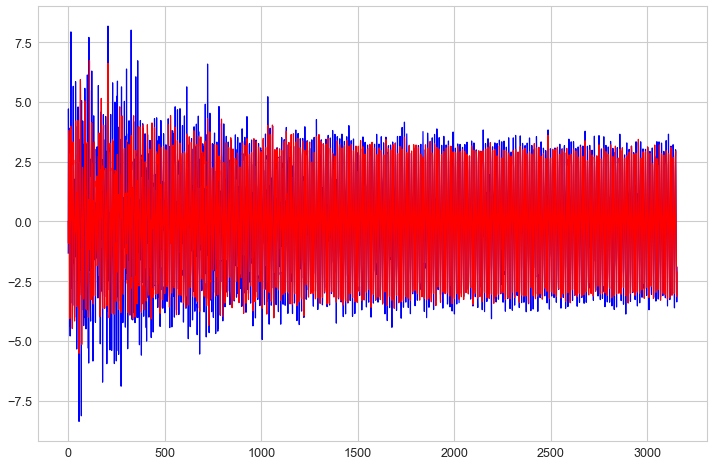

In [28]:
plt.figure(figsize=(12, 8))
plt.plot(tempDiff.values, color='blue')
preds = arma.fittedvalues
plt.plot(preds, color='red')
plt.show()



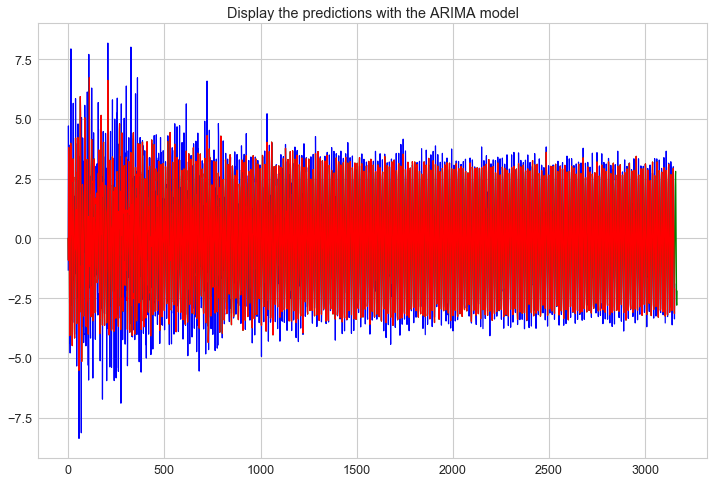

In [29]:
steps = 12

plt.figure(figsize=(12, 8))

plt.plot(tempDiff.values, color='blue')

forecast = arma.forecast(steps=steps)[0]
p0 = preds
f0 =  forecast
predForecast0= np.append(p0,f0)
predForecast0 = pd.DataFrame(predForecast0)

plt.plot(predForecast0, color='green')
plt.plot(p0, color='red')
plt.title('Display the predictions with the ARIMA model')

plt.show()


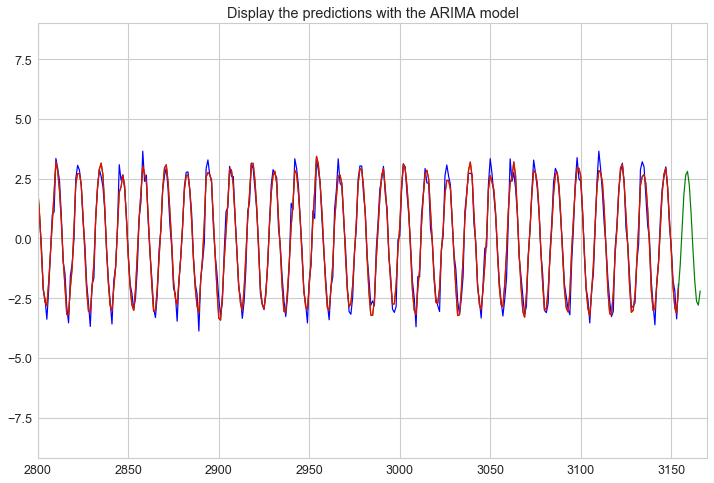

In [30]:
steps = 12

plt.figure(figsize=(12, 8))

axes = plt.axes()
axes.set_xlim([2800,3170])

plt.plot(tempDiff.values, color='blue')

forecast = arma.forecast(steps=steps)[0]
p0 = preds
f0 =  forecast
predForecast0= np.append(p0,f0)
predForecast0 = pd.DataFrame(predForecast0)

plt.plot(predForecast0, color='green')
plt.plot(p0, color='red')
plt.title('Display the predictions with the ARIMA model')

plt.show()


#### Back to level data

<function matplotlib.pyplot.show(*args, **kw)>

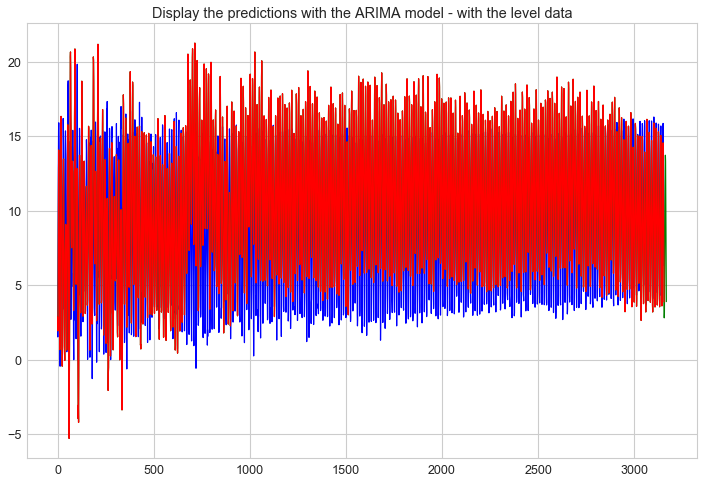

In [31]:
plt.figure(figsize=(12, 8))

tempLevel0 = np.append(startValue,tempDiff).cumsum()
plt.plot(tempLevel0, color='blue')


tempLevel_Forecast0 = np.append(startValue,predForecast0).cumsum()
plt.plot(tempLevel_Forecast0,color='green')

tempLevel_pred0 = np.append(startValue,p0).cumsum()
plt.plot(tempLevel_pred0,color='red')
plt.title('Display the predictions with the ARIMA model - with the level data')

plt.show

In [32]:
xtempLevel = pd.DataFrame (tempLevel0)
xtempLevel.tail(5)

,0
3151,15.552
3152,13.796
3153,11.598
3154,8.230
3155,6.315


<function matplotlib.pyplot.show(*args, **kw)>

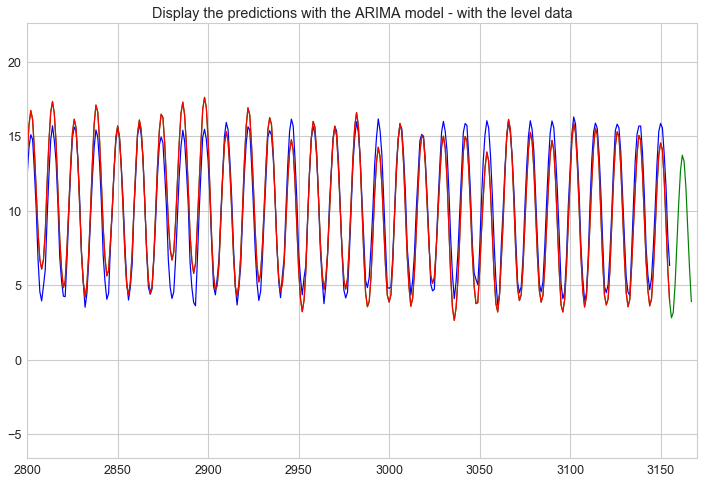

In [33]:
plt.figure(figsize=(12, 8))

axes = plt.axes()
axes.set_xlim([2800,3170])

tempLevel0 = np.append(startValue,tempDiff).cumsum()
plt.plot(tempLevel0, color='blue')


tempLevel_Forecast0 = np.append(startValue,predForecast0).cumsum()
plt.plot(tempLevel_Forecast0,color='green')

tempLevel_pred0 = np.append(startValue,p0).cumsum()
plt.plot(tempLevel_pred0,color='red')

plt.title('Display the predictions with the ARIMA model - with the level data')

plt.show

#### Performance of the prediction

In [34]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(tempLevel0, tempLevel_pred0)
print('MAE',mae)

MAE 2.220926663837409


In [35]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape=mean_absolute_percentage_error(tempLevel0, tempLevel_pred0)
print('MAPE %',mape)

MAPE % 85.52065081225827


##  Train Test Split method 1

https://machinelearningmastery.com/backtest-machine-learning-models-time-series-forecasting/

In [36]:
X = tempDiff.to_numpy()

Observations: 3155
Training Observations: 2524
Testing Observations: 631


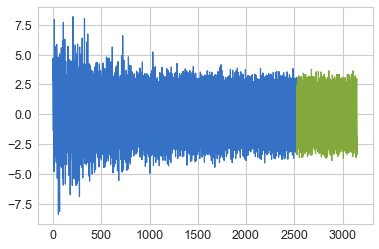

In [37]:

train_size = int(len(X) * (1-test_size))
train, test = X[0:train_size], X[train_size:len(X)]
print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))
plt.plot(train)
plt.plot([None for i in train] + [x for x in test])
plt.show()

## Re-Build ARIMA model

### ACF & PACF

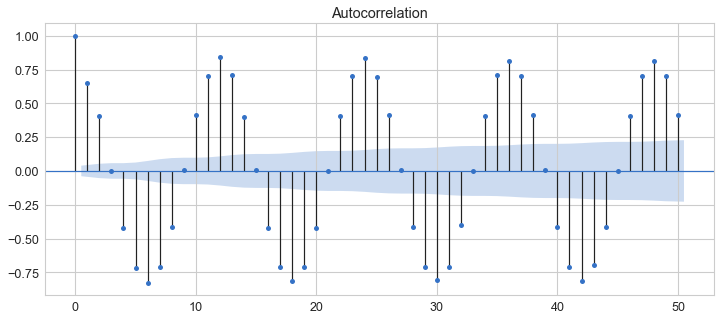

In [38]:
fig, ax = plt.subplots(figsize=(12,5))
plot_acf(train, lags=50, ax=ax)

plt.show()

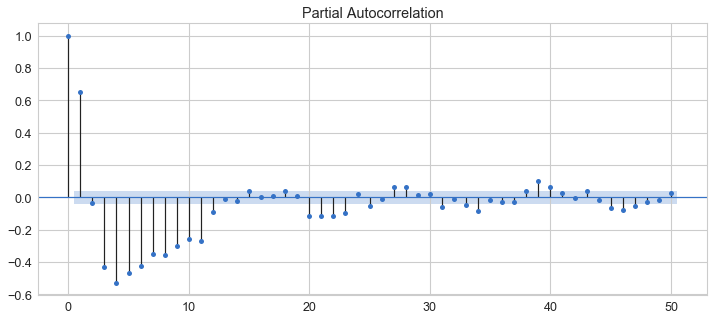

In [39]:
fig, ax = plt.subplots(figsize=(12,5))
plot_pacf(train, lags=50, ax=ax)
plt.show()

In [40]:
### the model

In [41]:
from statsmodels.tsa.arima_model import ARMA
arma_v2 = ARMA(tuple(train), (4,2)).fit()
arma_v2.summary()

C:\Users\Utilisateur\Anaconda3\envs\TimeSeries\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 2524
Model:                     ARMA(4, 2)   Log Likelihood               -3346.709
Method:                       css-mle   S.D. of innovations              0.910
Date:                Thu, 02 Apr 2020   AIC                           6709.417
Time:                        13:44:38   BIC                           6756.086
Sample:                             0   HQIC                          6726.352
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.408e-05      0.003      0.026      0.979      -0.006       0.006
ar.L1.y        1.1388      0.023     49.217      0.000       1.093       1.184
ar.L2.y       -0.2659      0.033     -8.088      0.000      -0.330      -0.201
ar.L3.y       -0.0867      0.030     -2.861      0.004      -0.146      -0.027
ar.L4.y       -0.2888      0.021    -13.685      0.000      -0.330      -0.247
ma.L1.y       -1.6408      0.014   -115.844      0.000      -1.669      -1.613
ma.L2.y        0.7309      0.025     29.598      0.000       0.683       0.779
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.8677           -0.5008j            1.0019           -0.0833
AR.2            0.8677           +0.5008j            1.0019            0.0833
AR.3           -1.0178           -1.5536j            1.8573           -0.3423
AR.4           -1.0178           +1.5536j            1.8573            0.3423
MA.1            1.1224           -0.3292j            1.1697           -0.0454
MA.2            1.1224           +0.3292j            1.1697            0.0454
-----------------------------------------------------------------------------
"""

### Prediction

In [42]:
steps = len(test)
y_arma_forecast = arma_v2.forecast(steps=steps)[0]
y_arma_forecast.shape

(631,)

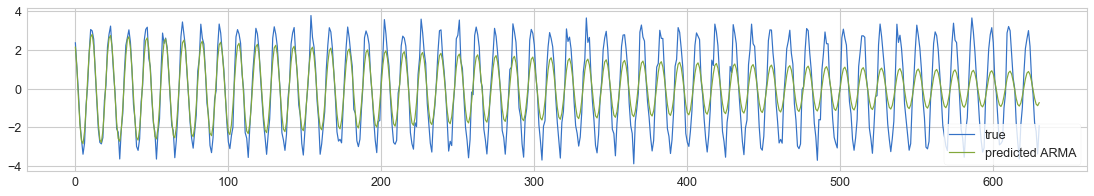

In [43]:
plt.figure(figsize=(19,3))

plt.plot(test,label="true")
plt.plot(y_arma_forecast,label="predicted ARMA")
plt.legend()
plt.show()

### Performance

In [44]:
from sklearn.metrics import mean_absolute_error
mae_arma = mean_absolute_error(test, y_arma_forecast)
print('MAE ARMA : ',mae_arma)

MAE ARMA :  0.8777851779983673


In [45]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_arma = mean_absolute_percentage_error(test, y_arma_forecast)
print('MAPE ARMA %',mape_arma)

MAPE ARMA % 56.3807900424693


# Train Test Split method 2

In [46]:
def _load_data(data, n_prev = 100):  
    """
    data should be pd.DataFrame()
    """

    docX, docY = [], []
    for i in range(len(data)-n_prev):
        docX.append(data.iloc[i:i+n_prev].to_numpy())
        docY.append(data.iloc[i+n_prev].to_numpy())
 
    alsX = np.array(docX)
    alsY = np.array(docY)

    return alsX, alsY

In [47]:
#df = pd.DataFrame(tempDiff)
df = pd.DataFrame(temp)
df.head(5)

,LandAverageTemperature
dt,
1753-01-01,2.039
1753-02-01,0.715
1753-03-01,5.424
1753-04-01,8.272
1753-05-01,12.186


In [ ]:
df2 = df.reset_index()
df = df2['diff']
df = pd.DataFrame(df)
df.head(5)

In [48]:
train_size = int(len(X) * (1-test_size))

In [49]:
df_train = df.iloc[:train_size]
df_test  = df.iloc[train_size + gap:]
(X_train, y_train) = _load_data(df_train, n_prev = length_of_sequences)
(X_test, y_test)   = _load_data(df_test, n_prev = length_of_sequences)  
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2514, 10, 1) (2514, 1) (622, 10, 1) (622, 1)


# Build RNN model

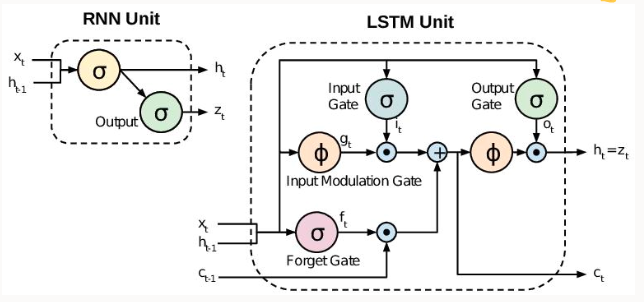

In [50]:
from IPython.display import Image
Image("lstm.png")

simple RNN  
https://www.datatechnotes.com/2018/12/rnn-example-with-keras-simplernn-in.html  
https://medium.com/@haydarozler/time-series-forecasting-with-recurrent-neural-network-rnn-f0f7476fc063

Why validation loss is lower than training loss  
https://www.pyimagesearch.com/2019/10/14/why-is-my-validation-loss-lower-than-my-training-loss/

## The model

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.layers import Dropout

In [52]:
# SimpleRNN model
model_rnn = Sequential()
model_rnn.add(SimpleRNN(units=10, input_shape=(length_of_sequences,1), activation="relu"))
model_rnn.add(Dense(1))
model_rnn.compile(loss='mse', optimizer='adam')
model_rnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 10)                120       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [53]:
hist = model_rnn.fit(X_train, y_train, epochs=50, 
                 verbose=1, validation_data = (X_test, y_test),shuffle=False)


Train on 2514 samples, validate on 622 samples
Epoch 1/50
2514/2514 [==============================] - 1s 496us/sample - loss: 117.1080 - val_loss: 79.9347
Epoch 2/50
2514/2514 [==============================] - 0s 125us/sample - loss: 38.0000 - val_loss: 20.0754
Epoch 3/50
2514/2514 [==============================] - 0s 127us/sample - loss: 21.8978 - val_loss: 18.7600
Epoch 4/50
2514/2514 [==============================] - 0s 128us/sample - loss: 20.3555 - val_loss: 17.4182
Epoch 5/50
2514/2514 [==============================] - 0s 131us/sample - loss: 18.8604 - val_loss: 15.9951
Epoch 6/50
2514/2514 [==============================] - 0s 125us/sample - loss: 17.2612 - val_loss: 14.4605
Epoch 7/50
2514/2514 [==============================] - 0s 129us/sample - loss: 15.5387 - val_loss: 12.8171
Epoch 8/50
2514/2514 [==============================] - 0s 125us/sample - loss: 13.6379 - val_loss: 11.0748
Epoch 9/50
2514/2514 [==============================] - 0s 132us/sample - loss: 12.0622 

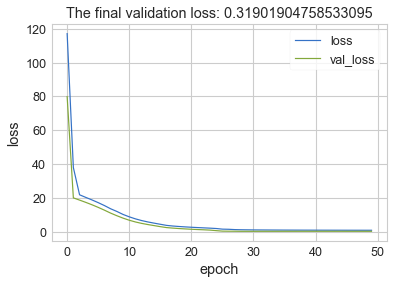

In [54]:
for label in ["loss","val_loss"]:
    plt.plot(hist.history[label],label=label)

plt.ylabel("loss")
plt.xlabel("epoch")
plt.title("The final validation loss: {}".format(hist.history["val_loss"][-1]))
plt.legend()
plt.show()


## Prediction

In [55]:
y_rnn_predictions = model_rnn.predict(X_test)
y_rnn_predictions.shape

(622, 1)

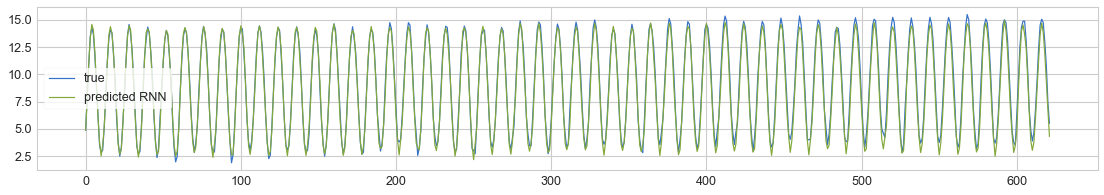

In [56]:
plt.figure(figsize=(19,3))

plt.plot(y_test,label="true")
plt.plot(y_rnn_predictions,label="predicted RNN")
plt.legend()
plt.show()

## Performance of the model

In [57]:
from sklearn.metrics import mean_absolute_error
mae_rnn = mean_absolute_error(y_test, y_rnn_predictions)
print('MAE RNN : ',mae_rnn)

MAE RNN :  0.45487010981568954


In [58]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_rnn = mean_absolute_percentage_error(y_test, y_rnn_predictions)
print('MAPE RNN %',mape_rnn)

MAPE RNN % 6.577470943439407


# Build LSTM model

https://fairyonice.github.io/Understand-Keras%27s-RNN-behind-the-scenes-with-a-sin-wave-example.html  

https://forecasters.org/wp-content/uploads/gravity_forms/7-c6dd08fee7f0065037affb5b74fec20a/2017/07/Laptev_Nikolay_ISF2017.pdf

## The model

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN
from tensorflow.keras.layers import Dense

n_input= X_train.shape[1]
n_features = X_train.shape[2] 

lstm_model = Sequential()
lstm_model.add(LSTM(20, activation='tanh', input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 20)                1760      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________


In [60]:
 history_lstm_model = lstm_model.fit(X_train, y_train, 
                                     epochs=50,
                                     verbose = False ,
                                     validation_data = (X_test, y_test),
                                    shuffle=False)

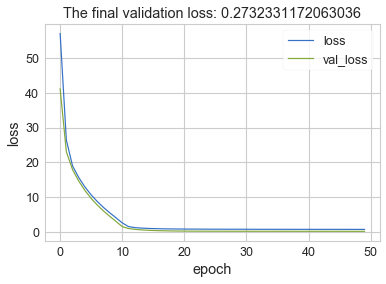

In [61]:
for label in ["loss","val_loss"]:
    plt.plot(history_lstm_model.history[label],label=label)

plt.ylabel("loss")
plt.xlabel("epoch")
plt.title("The final validation loss: {}".format(history_lstm_model.history["val_loss"][-1]))
plt.legend()
plt.show()

## Prediction on y_Test

In [62]:
y_lstm_predictions = lstm_model.predict(X_test)
y_lstm_predictions.shape

(622, 1)

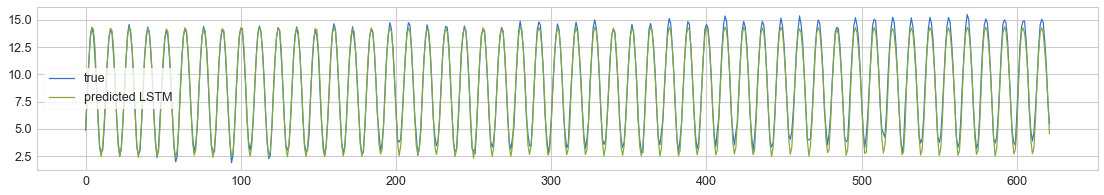

In [63]:
plt.figure(figsize=(19,3))

plt.plot(y_test,label="true")
plt.plot(y_lstm_predictions,label="predicted LSTM")
plt.legend()
plt.show()

## Performance of the model

In [64]:
from sklearn.metrics import mean_absolute_error
mae_lstm = mean_absolute_error(y_test, y_lstm_predictions)
print('MAE LSTM : ',mae_lstm)

MAE LSTM :  0.40297584703574224


In [65]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_lstm = mean_absolute_percentage_error(y_test, y_lstm_predictions)
print('MAPE LSTM %',mape_lstm)

MAPE LSTM % 6.460371045047186


# Build XGBoost

https://www.kaggle.com/furiousx7/xgboost-time-series

In [66]:
import xgboost as xgb
model_xgb = xgb.XGBRegressor(n_estimators=1000)

In [67]:
# Reshape X train
X_train2 = X_train.reshape (X_train.shape[0],X_train.shape[1])
X_test2 = X_test.reshape (X_test.shape[0],X_test.shape[1])
print(X_train2.shape,X_test2.shape)

(2514, 10) (622, 10)


In [68]:
model_xgb.fit(X_train2, y_train)

[13:45:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

## Prediction

In [69]:
y_xgboost_predictions = model_xgb.predict(X_test2)
y_xgboost_predictions.shape

(622,)

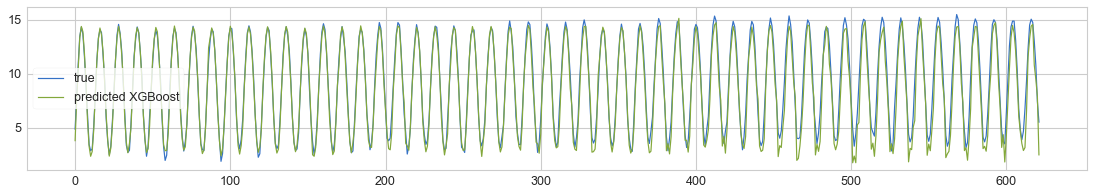

In [70]:
plt.figure(figsize=(19,3))

plt.plot(y_test,label="true")
plt.plot(y_xgboost_predictions,label="predicted XGBoost")
plt.legend()
plt.show()

## Performance

In [71]:
from sklearn.metrics import mean_absolute_error
mae_xgboost = mean_absolute_error(y_test, y_xgboost_predictions)
print('MAE XGBoost : ',mae_xgboost)

MAE XGBoost :  0.6465676914166023


In [72]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_xgboost = mean_absolute_percentage_error(y_test, y_xgboost_predictions)
print('MAPE XGBoost %',mape_xgboost)

MAPE XGBoost % 72.2693314252676


# Experimentation by Timeseriesgenerator

In [73]:
from keras.preprocessing.sequence import TimeseriesGenerator
# reshape to [look-back, n_features]
n_features = 1
train2 = train.reshape((len(train), n_features))
test2 = test.reshape((len(test), n_features))
X_train_generator = TimeseriesGenerator(train2, train2, length=length_of_sequences, batch_size=1)
X_test_generator = TimeseriesGenerator(test2, test2, length=length_of_sequences, batch_size=1)
print(len(X_train_generator), len(X_test_generator))
# print each sample
#for i in range(len(X_train_generator)):
#	x, y = X_train_generator[i]
#	print('%s => %s' % (x, y))

2514 621


## Build SimpleRNN model

In [74]:
# SimpleRNN model version 2
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras.layers import LeakyReLU
model_rnn2 = Sequential()
model_rnn2.add(SimpleRNN(units=10, input_shape=(length_of_sequences,1), activation="relu"))
model_rnn2.add(Dense(1))
model_rnn2.compile(loss='mse', optimizer='adam')
model_rnn2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 10)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [75]:
# fit model
hist_model_rnn2 = model_rnn2.fit_generator(X_train_generator, validation_data =X_test_generator, steps_per_epoch=500,epochs=20, verbose=1)

Epoch 1/20
500/500 [==============================] - 2s 5ms/step - loss: 2.3957 - val_loss: 0.9281
Epoch 2/20
500/500 [==============================] - 2s 4ms/step - loss: 1.7006 - val_loss: 1.0481
Epoch 3/20
500/500 [==============================] - 2s 4ms/step - loss: 1.4249 - val_loss: 0.4443
Epoch 4/20
500/500 [==============================] - 2s 4ms/step - loss: 1.2600 - val_loss: 0.4001
Epoch 5/20
500/500 [==============================] - 2s 4ms/step - loss: 1.2842 - val_loss: 0.2993
Epoch 6/20
500/500 [==============================] - 2s 4ms/step - loss: 1.1029 - val_loss: 0.4631
Epoch 7/20
500/500 [==============================] - 2s 4ms/step - loss: 1.0778 - val_loss: 0.4988
Epoch 8/20
500/500 [==============================] - 2s 4ms/step - loss: 1.1828 - val_loss: 0.8854
Epoch 9/20
500/500 [==============================] - 2s 4ms/step - loss: 1.1650 - val_loss: 1.4381
Epoch 10/20
500/500 [==============================] - 2s 4ms/step - loss: 1.1283 - val_loss: 0.3032

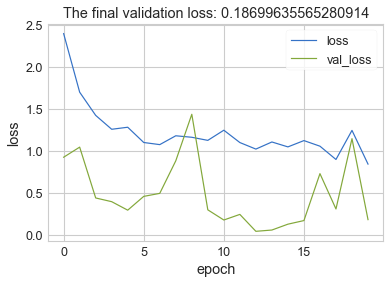

In [76]:
for label in ["loss","val_loss"]:
    plt.plot(hist_model_rnn2.history[label],label=label)

plt.ylabel("loss")
plt.xlabel("epoch")
plt.title("The final validation loss: {}".format(hist_model_rnn2.history["val_loss"][-1]))
plt.legend()
plt.show()

# Global Results at this stage

In [77]:
global_results = pd.DataFrame({'ARMA' : [mae_arma],
                               'RNN (KERAS)' : [mae_rnn],
                               'LSTM (KERAS)' : [mae_lstm],
                               'XGBoost' : [mae_xgboost]
                              }, index = ['MAE']
                              )
global_results

,ARMA,RNN (KERAS),LSTM (KERAS),XGBoost
MAE,0.877785,0.45487,0.402976,0.646568
